In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Project - 1 | Machine Learning/combinedcsv.csv'
df = pd.read_csv(file_path)


In [ ]:
target = df['malicious']
df = df.drop(columns=['malicious', 'md5_hash'])

# Standardize the data (recommended for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(df_scaled, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:967: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(self.var_), copy=False, constant_mask=constant_mask


In [ ]:
best_params = {
    'C': 1,
    'penalty': 'l1',
    'solver': 'liblinear'
}


In [ ]:
best_logistic = LogisticRegression(**best_params)
best_logistic.fit(X_train, y_train)

# Use the best estimator to identify important features
important_features = np.where(best_logistic.coef_[0] != 0)[0]

# Select only the important features for the Random Forest model
X_train_selected = X_train[:, important_features]
X_valid_selected = X_valid[:, important_features]
X_test_selected = X_test[:, important_features]

Epoch 1/100
1545/1545 - 19s - loss: 0.1772 - accuracy: 0.9388 - val_loss: 0.1500 - val_accuracy: 0.9498 - 19s/epoch - 13ms/step
Epoch 2/100
1545/1545 - 18s - loss: 0.1227 - accuracy: 0.9556 - val_loss: 0.1436 - val_accuracy: 0.9528 - 18s/epoch - 12ms/step
Epoch 3/100
1545/1545 - 17s - loss: 0.1099 - accuracy: 0.9610 - val_loss: 0.1294 - val_accuracy: 0.9570 - 17s/epoch - 11ms/step
Epoch 4/100
1545/1545 - 18s - loss: 0.0947 - accuracy: 0.9652 - val_loss: 0.1448 - val_accuracy: 0.9572 - 18s/epoch - 11ms/step
Epoch 5/100
1545/1545 - 17s - loss: 0.0864 - accuracy: 0.9675 - val_loss: 0.1506 - val_accuracy: 0.9622 - 17s/epoch - 11ms/step
Epoch 6/100
1545/1545 - 16s - loss: 0.0768 - accuracy: 0.9708 - val_loss: 0.1483 - val_accuracy: 0.9613 - 16s/epoch - 11ms/step
Epoch 7/100
1545/1545 - 18s - loss: 0.0720 - accuracy: 0.9728 - val_loss: 0.1582 - val_accuracy: 0.9601 - 18s/epoch - 12ms/step
Epoch 8/100
1545/1545 - 17s - loss: 0.0648 - accuracy: 0.9750 - val_loss: 0.1488 - val_accuracy: 0.9606 

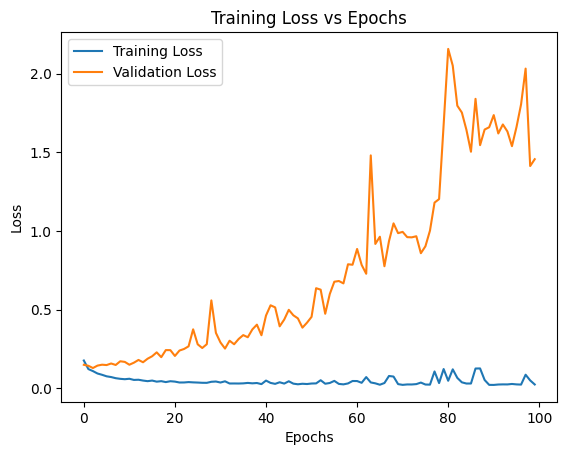

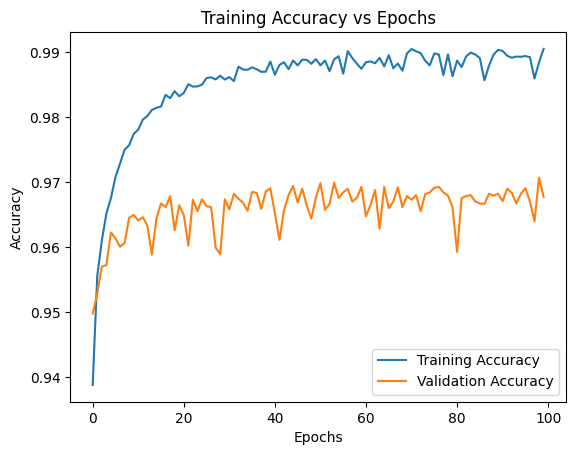

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the ANN model with a higher number of neurons
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train_selected.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification, so using a sigmoid activation function
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model with verbose details and early stopping
# Train the model with verbose details and early stopping
history = model.fit(X_train_selected, y_train, epochs=100,
                    validation_data=(X_valid_selected, y_val), verbose=2)

# Evaluate the model on the training set
train_preds = (model.predict(X_train_selected) > 0.5).astype(int)
train_accuracy = accuracy_score(y_train, train_preds)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the validation set
val_preds = (model.predict(X_valid_selected) > 0.5).astype(int)
val_accuracy = accuracy_score(y_val, val_preds)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
test_preds = (model.predict(X_test_selected) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy:", test_accuracy)

# Confusion Matrix for Training Set
train_conf_matrix = confusion_matrix(y_train, train_preds)
print("Confusion Matrix - Training Set:\n", train_conf_matrix)

# Confusion Matrix for Validation Set
val_conf_matrix = confusion_matrix(y_val, val_preds)
print("Confusion Matrix - Validation Set:\n", val_conf_matrix)

# Confusion Matrix for Test Set
test_conf_matrix = confusion_matrix(y_test, test_preds)
print("Confusion Matrix - Test Set:\n", test_conf_matrix)

# Classification Report for Training Set
print("Classification Report - Training Set:\n", classification_report(y_train, train_preds))

# Classification Report for Validation Set
print("Classification Report - Validation Set:\n", classification_report(y_val, val_preds))

# Classification Report for Test Set
print("Classification Report - Test Set:\n", classification_report(y_test, test_preds))

# Plot Training Loss vs Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training Accuracy vs Epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
